In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as trnure is 0 and no total charges are recorded
And also change datatype object to float 

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

np.int64(0)

In [10]:
def conv(values):
    if values == 1:
        return 'Yes'
    else:
        return 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)   

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

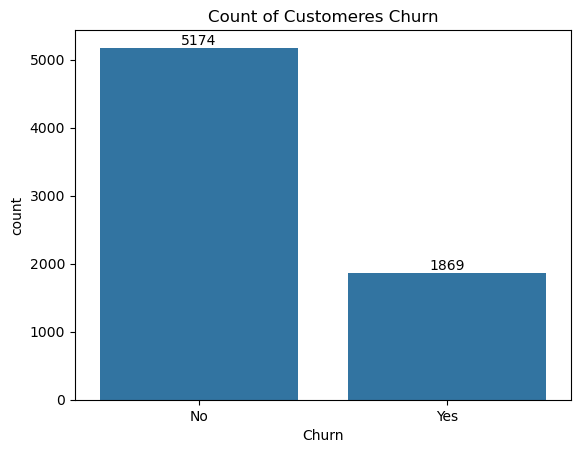

In [11]:
ax = sns.countplot(x = 'Churn' , data = df)
plt.title("Count of Customeres Churn")
ax.bar_label(ax.containers[0])
plt.show()

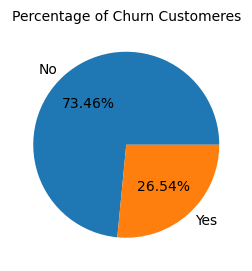

In [12]:
plt.figure(figsize=(3,4))
plt.title("Percentage of Churn Customeres",fontsize=10)
gb = df.groupby('Churn').agg({'Churn' : "count"})
plt.pie(gb['Churn'],labels = gb.index,autopct = "%1.2f%%")
plt.show()

`#from the given pie chart we can conclude that 26.54% customers are churn out`
`#now let's explore the reason behind it`

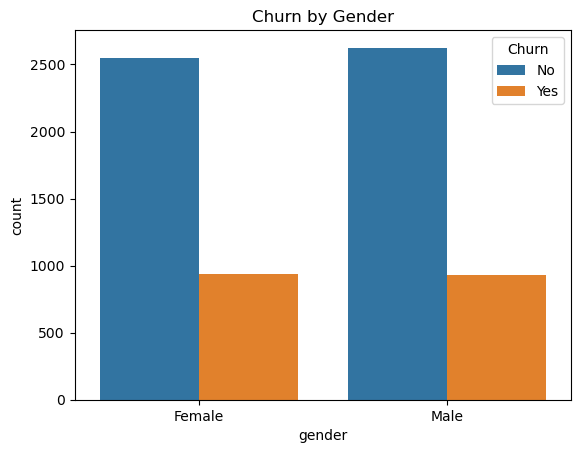

In [13]:
sns.countplot(x = 'gender',data=df,hue='Churn')
plt.title("Churn by Gender")
plt.show()

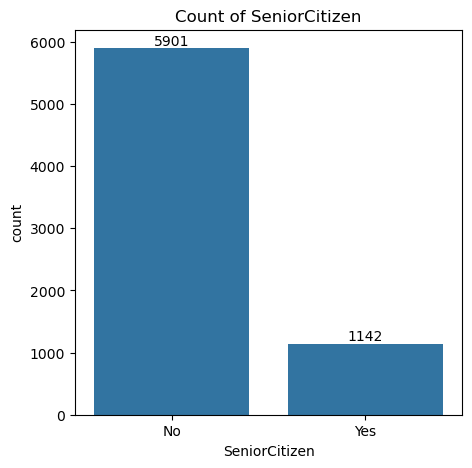

In [14]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = 'SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of SeniorCitizen")
plt.show()

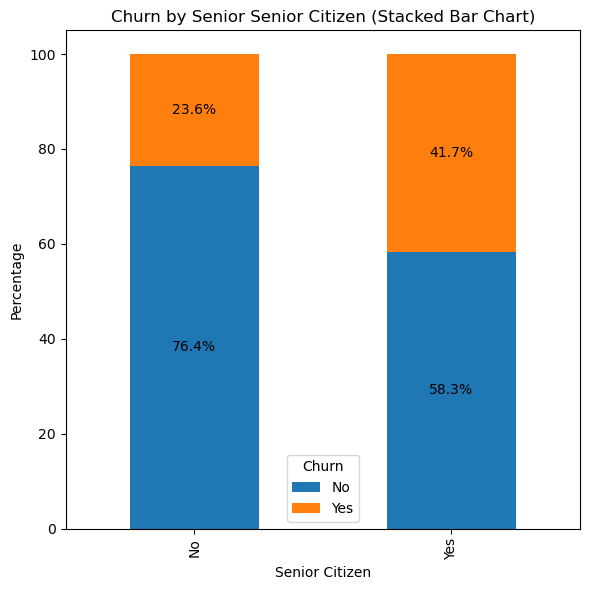

In [15]:
count_df = pd.crosstab(df['SeniorCitizen'], df['Churn'])
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = percent_df.plot(
    kind='bar',
    stacked=True,
    figsize=(6,6)
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',
        label_type='center'
    )

plt.title('Churn by Senior Senior Citizen (Stacked Bar Chart)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

`#comparative a greated pecentage of people in senior citizen category have churned.`

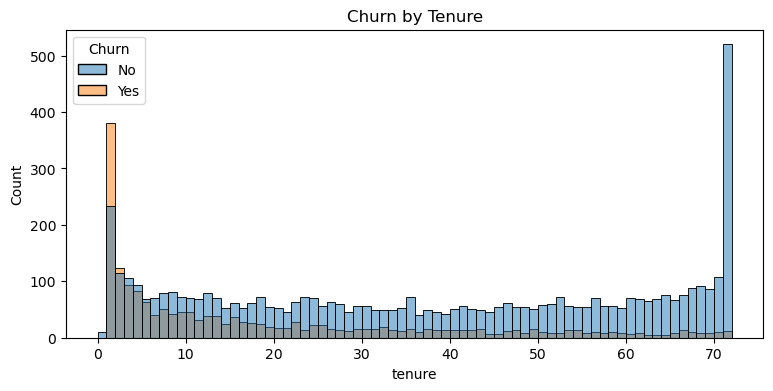

In [16]:
plt.figure(figsize=(9,4))
plt.title('Churn by Tenure')
sns.histplot(x='tenure', data=df, bins=72, hue = 'Churn')
plt.show()

`#people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned.`

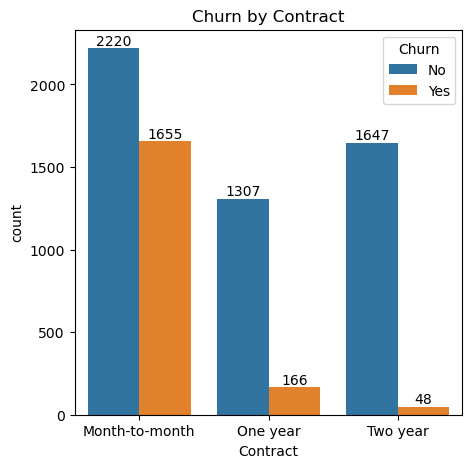

In [17]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = 'Contract',data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Contract")
plt.show()

`#people who have month to month contract are likrely to churn then from those who have 1 or 2 years of contract.`

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

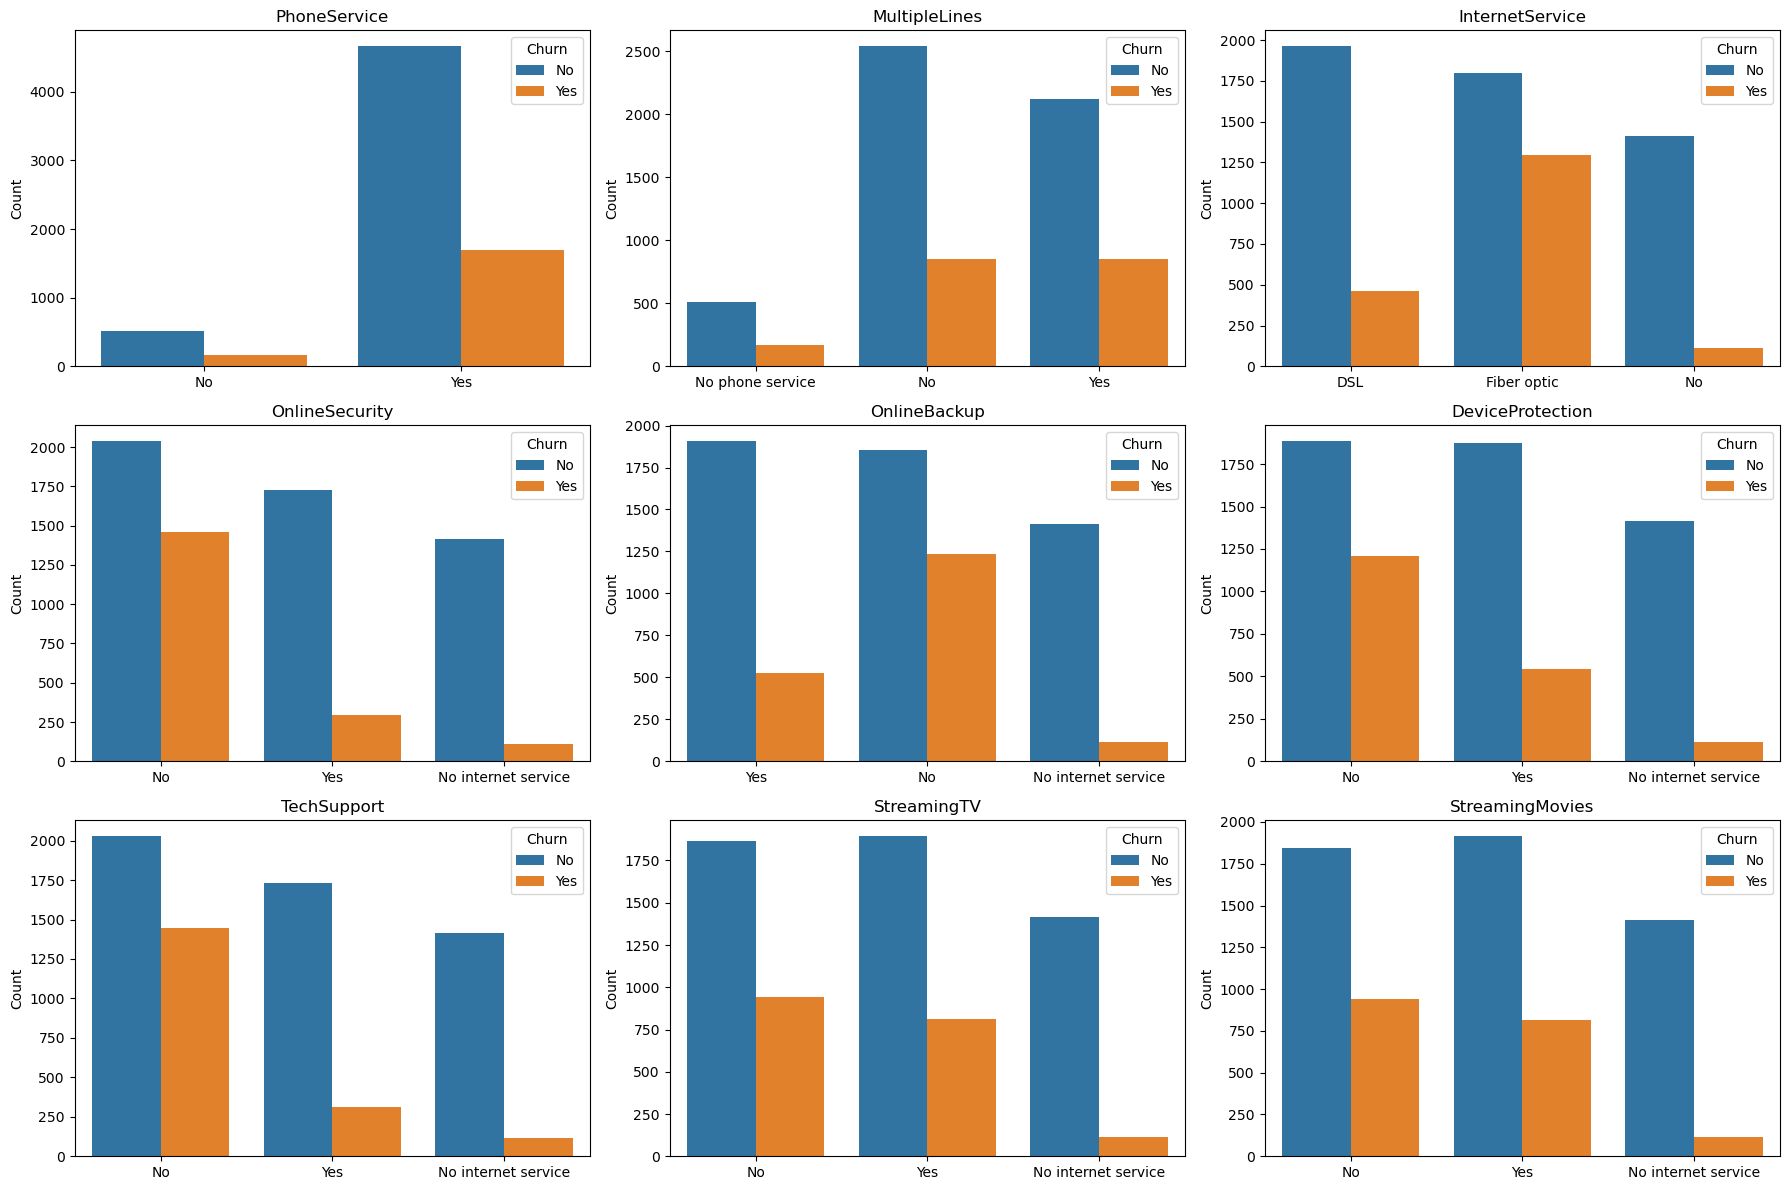

In [19]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set subplot grid (3 rows × 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Create countplots
for i, col in enumerate(columns):
    sns.countplot(
        x=col,
        data=df,
        ax=axes[i],
        hue="Churn"
    )
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

`#Customers without OnlineSecurity, TechSupport, OnlineBackup, or DeviceProtection show significantly higher churn compared to those who have these services.`

`#Fiber optic internet users have a noticeably higher churn rate than DSL users, indicating possible cost or service issues.`

`#Customers with multiple lines and streaming services exhibit moderate churn, but less impact compared to security/support services.`

`#Overall, value-added services (security & support) play a critical role in customer retention.`

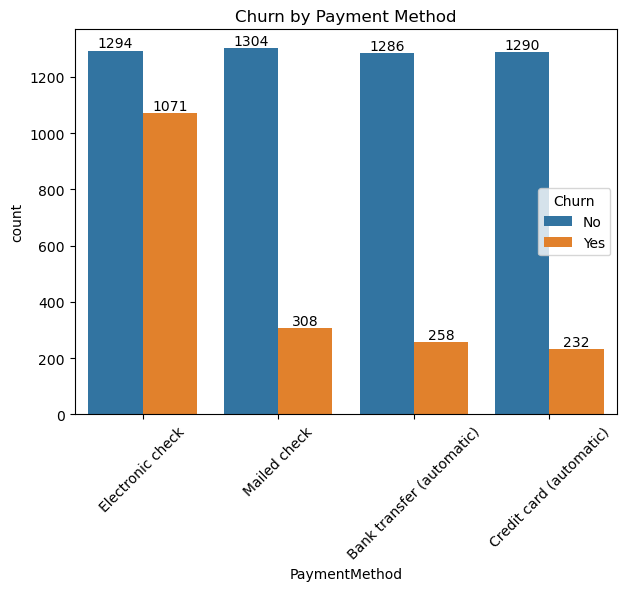

In [20]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'PaymentMethod',data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method.